## DRAGON REAL ESTATE PRICE PREDICTOR (BOSTON HOUSING DATA SET FROM UCI REPO)

In [1295]:
import pandas as pd
import numpy as np

In [1296]:
housing = pd.read_csv ("data.csv") #load the housing dataset

In [1297]:
housing.head() # show the top 5 rows in the csv file

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [1298]:
housing.info()  #gives the info like # rows and columns of the csv



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [1299]:
housing ['CHAS'].value_counts()   #example of the number of the entries for each value 
#in the feature 'CHAS e.g,. 452 values in CHAS have 452 values that are 0.0 and 34 are 1.0'

CHAS
0    463
1     43
Name: count, dtype: int64

In [1300]:
housing.describe()
# description:
# forexample
# min / max gives the minimum and the maximum value of each
# percentiles e.g., 25% row: 25% of the values of each feature are <= that particular value 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,506.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.084980,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.279128,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

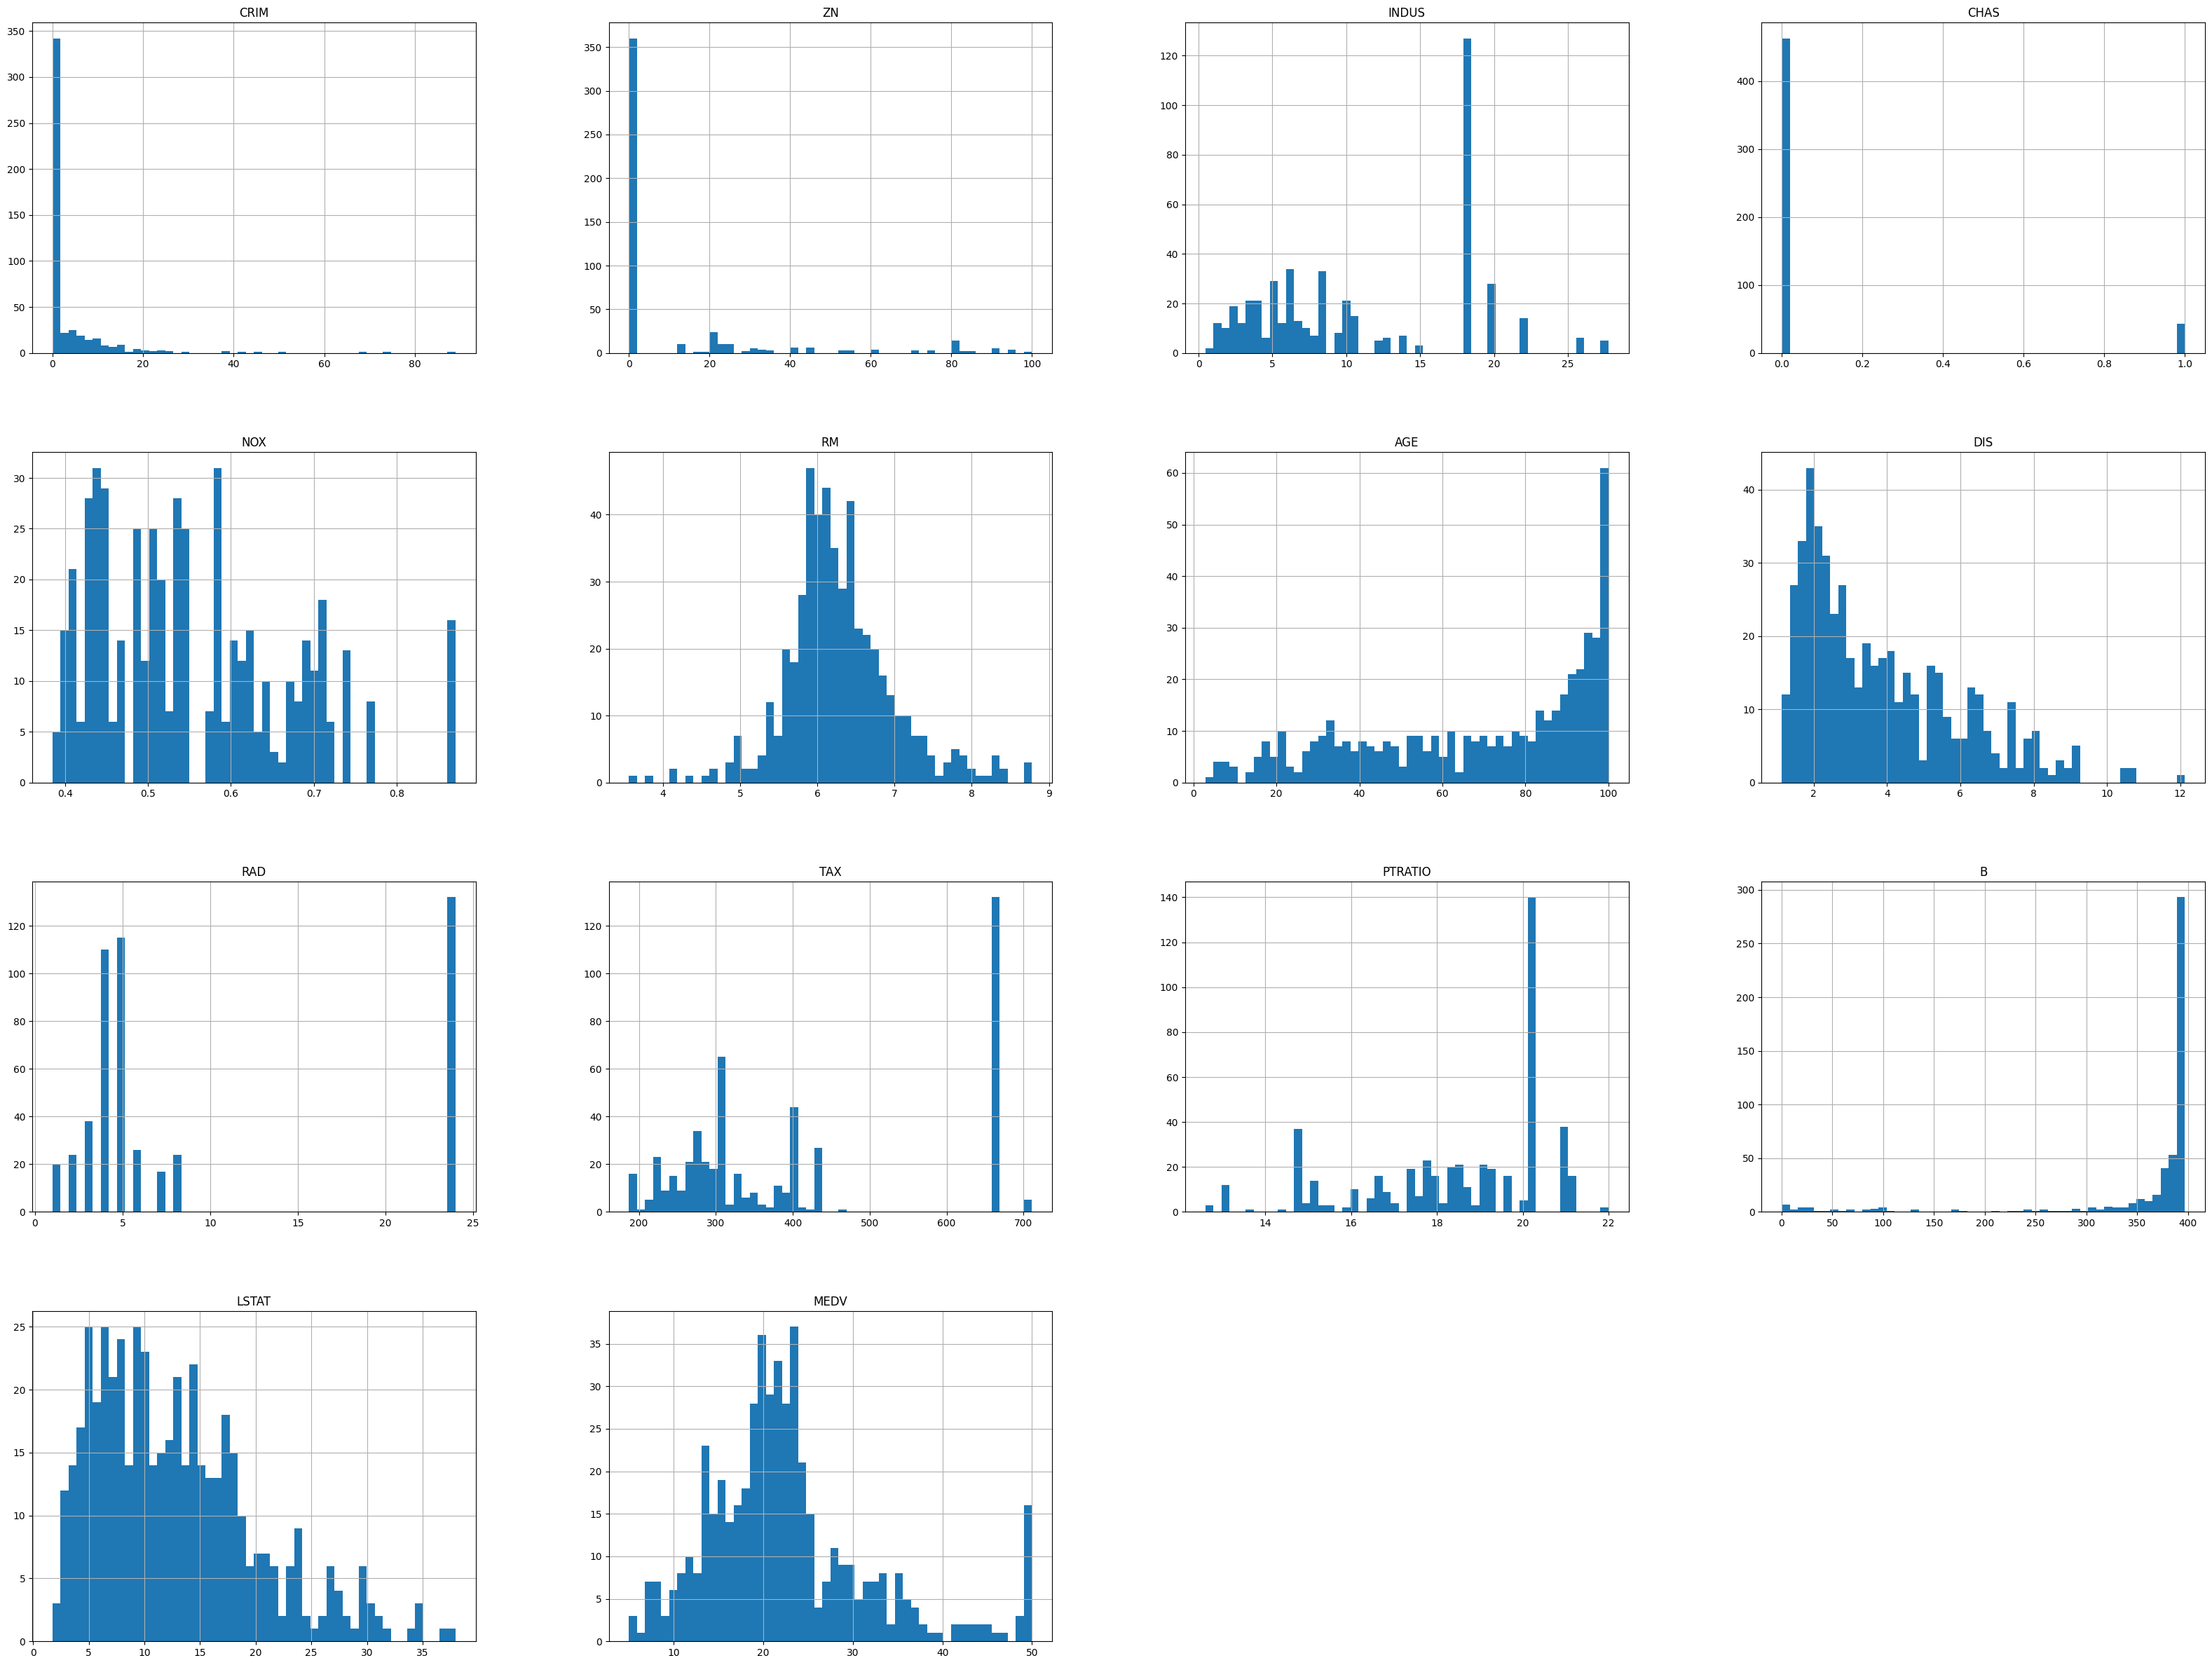

In [1301]:

# This snippet plots the histogram i.e it displays the number of towns in Boston
# that have that particular value of the feature... 
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize = (40, 30))

TRAIN TEST SPLITTING

In [1302]:

## TRAIN DATA AND TEST DATA SPLITTING
# WE HAVE TO SPlIT THE DATA INTO TRAINING DATA AND TESTING DATA, SO WE HAVE TO SPLIT THE DATA INTO IT
# def split_train_test (data, test_ratio):
#     np.random.seed(50) # you will get the same random permutation of indices, which results in the same train-test split
#     shuffled = np.random.permutation (len(data))  # shuffles the row NUMBERS  of the dataset we provide to it
#     #shuffled: This array contains a random permutation of indices from 0 to len(data) 
#     #- 1. forexample, If len(data) is 100, shuffled might look something like [32, 14, 8, 97, 23, ...].
#     #Note: shuffled array contains the row indices only, not the actual rows.
#     #print (shuffled)
#     test_size_set = int (len(data) * test_ratio)  # determining the size of the test data
#     test_indices = shuffled [:test_size_set]      
#     # test_indices: This array contains the first (test_size_set) indices from the shuffled array. 
#     # If test_size_set is 20, test_indices will be the first 20 elements of the shuffled array, e.g., [32, 14, 8, 97, 23, ...].
    
#     train_indices = shuffled [test_size_set:]
#     #train_indices: an array that contains the train_size_set indices from the shuffled array.

#     training_data = data.iloc[train_indices] # training_data now contains the actual rows of the data specified in 'train_indices'
#     testing_data = data.iloc[test_indices] # testing_data now contains the actual rows of the data specified in 'test_indices'
#     return training_data, testing_data  # return the train_data and the test_data
    

In [1303]:

#train_set, test_set = split_train_test(housing, 0.2)

In [1304]:
# print(len(train_set))
# print(len(test_set))

In [1305]:
# Note: the above split_train_test function we coded for learning purposes is already made in sklearn
# so we just use that...
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split (housing, test_size=0.3, random_state=50)

# housing: This is the DataFrame containing your dataset.
# test_size=0.2: This parameter specifies that 20% of the data should be used for the test set, and the remaining 80% will be used for the training set.
# random_state=50: This parameter sets the seed for the random number generator,
# ensuring that the split is reproducible. Every time you run this code with the same random_state, you will get the same train-test split.

In [1306]:
print ("Size of the total data set is: ", len(housing))
print ("Size of the testing data set is: ",len(test_set))  # 20% of the data is the test data
print ("Size of the training data set is: ",len(train_set)) # 80% of the data is the training data

Size of the total data set is:  506
Size of the testing data set is:  152
Size of the training data set is:  354


In [1307]:
# But now we have to do "stratified sampling" for 'CHAS', because we know that the "CHAS" feature 
# has 452 values of 0.0 and rest values are 1; as we are training the data on 354 values,
# it is possible that all the 354 training data values are 0.0 without any 1 in them which could
# affect the test_data.

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit( n_splits = 1, test_size=0.30, train_size=0.70, random_state = 50)

# Now we perform the 'stratified split'
for train_index, test_index in split.split (housing, housing ['CHAS']):
    # train index and test_index are arrays of indices of 'housing'
    strat_train_set = housing.loc [train_index] #selects all rows from 'housing' whose indices are in 'train_index' 
    strat_test_set = housing.loc[test_index] #selects all the rows from 'housing' whose indices are in 'test_index'

# Now the proportions of the 0s and 1s is the same in both the train and the test data sets of the feature 'CHAS'


In [1308]:
housing = strat_train_set.copy() # now we have a copy of the train_Set and we will further utilize the train set

In [1309]:
 ## LOOKING FOR CORRELATIONS
corr_matrix = housing.corr()
corr_matrix ['MEDV'].sort_values (ascending = False)

# The positive values indicate a positive correlation, e.g,. RM is
# a positive correlation with respect to 'MEDV', so it means that as
# RM increases, MEDV also increases.
# Negative correlation is opposite
# values closer to -1 or 1 indicate a stronger relationship and values
# closer to 0 indicate a weaker relationship

MEDV       1.000000
RM         0.669361
ZN         0.411093
B          0.325502
DIS        0.287292
CHAS       0.087539
CRIM      -0.383096
RAD       -0.395287
AGE       -0.461319
NOX       -0.466343
TAX       -0.484293
PTRATIO   -0.501208
INDUS     -0.533362
LSTAT     -0.736270
Name: MEDV, dtype: float64

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='CHAS', ylabel='RM'>,
        <Axes: xlabel='AGE', ylabel='RM'>,
        <Axes: xlabel='PTRATIO', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>,
        <Axes: xlabel='CHAS', ylabel='ZN'>,
        <Axes: xlabel='AGE', ylabel='ZN'>,
        <Axes: xlabel='PTRATIO', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='CHAS', ylabel='MEDV'>,
        <Axes: xlabel='AGE', ylabel='MEDV'>,
        <Axes: xlabel='PTRATIO', ylabel='MEDV'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xl

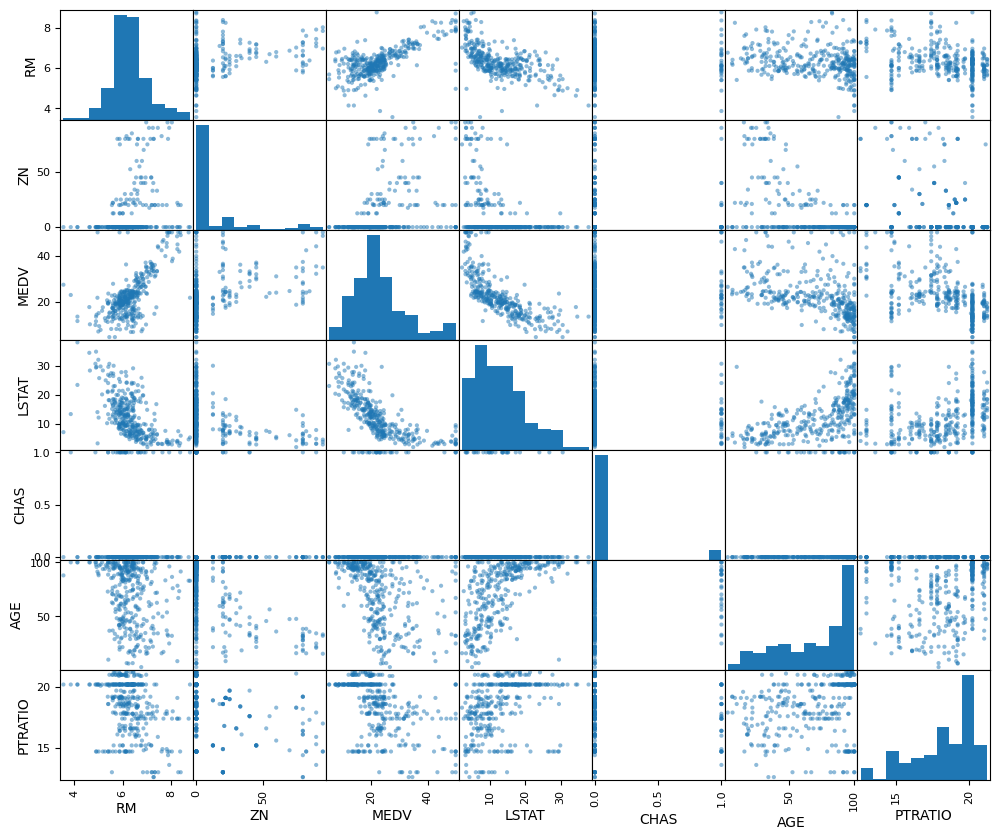

In [1310]:
import pandas as pd
from pandas.plotting import scatter_matrix
attributes= ["RM", "ZN", "MEDV", "LSTAT", "CHAS","AGE", "PTRATIO"]
scatter_matrix(housing[attributes], figsize = (12,10))

# We draw scatter graphs to show the relationship between different features
# We, through the scatter points, can also see the positive/negative correlation between 
# MEDV and the other features as described in the above snippet of code
# Note: if one attribute (lets say 'AGE') is plotted against itself, 
# then it shows the bar graph, which tells us the total number of data points
# corresponding to that particular value of tge feature...

<Axes: xlabel='RM', ylabel='MEDV'>

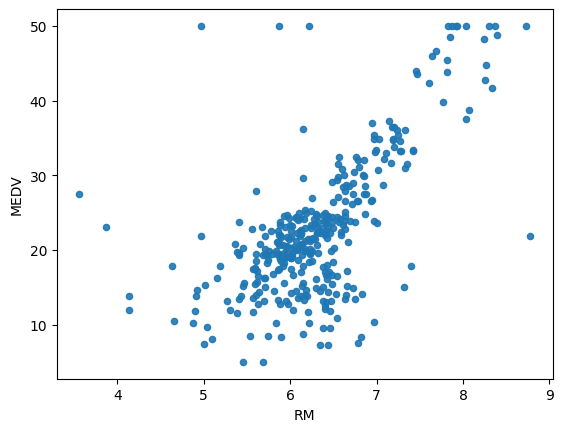

In [1311]:
 housing.plot (kind = "scatter", x= "RM", y = "MEDV", alpha = 0.9)
# One of the examples how we can remove the outliers and the abnormal data points such as 
# the points where the RM 5 and RM 9 have the same MEDV ($50, 000)

<Axes: xlabel='TAX', ylabel='RM'>

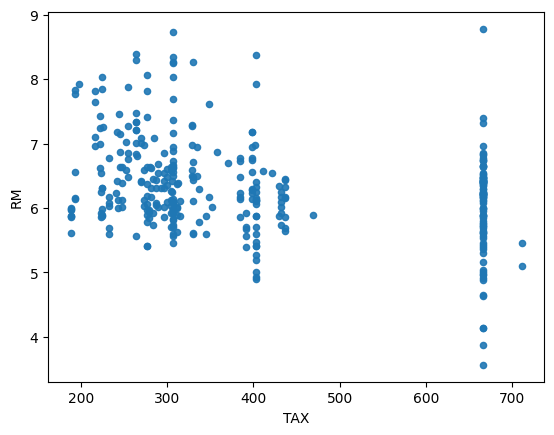

In [1312]:
housing.plot (kind = "scatter", x= "TAX", y = "RM", alpha = 0.9)
# FOREXAMPLE, HERE WE CAN PLOT TAX RATES AGAINST RM

In [1313]:
## WE CAN ALSO TRY DIFFERENT COMBINATIONS OF ATTRIBUTES 

In [1314]:
housing ["TAX\RM"] = housing["TAX"] / housing["RM"]

In [1315]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX\RM
312,0.26169,0.0,9.90,0,0.5440,6.023,90.4,2.8340,4,304,18.4,396.30,11.72,19.4,50.473186
188,0.12579,45.0,3.44,0,0.4370,6.556,29.1,4.5667,5,398,15.2,382.84,4.56,29.8,60.707749
120,0.06899,0.0,25.65,0,0.5810,5.870,69.7,2.2577,2,188,19.1,389.15,14.37,22.0,32.027257
281,0.03705,20.0,3.33,0,0.4429,6.968,NaN,5.2447,5,216,14.9,392.23,4.59,35.4,30.998852
258,0.66351,20.0,3.97,0,0.6470,7.333,100.0,1.8946,5,264,13.0,383.29,7.79,36.0,36.001636


In [1316]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [1317]:
housing_labels

312    19.4
188    29.8
120    22.0
281    35.4
258    36.0
       ... 
496    19.7
322    20.4
443    15.4
144    11.8
421    14.2
Name: MEDV, Length: 354, dtype: float64

In [1318]:
# We can see that there are many missing attributes in the features, i we look at the housing dataset in the csv file
# so what we can do is that we could fill those missing (NA) values with
# the median of all the values in AGE  (ONE OF THE WAYS)

#median_AGE = housing["AGE"].median()
#housing["AGE"].fillna(median_AGE)
# so in the final result, there should be 506 values in the AGE attribute.
# But instead of this tedious task, we can find the median / mean value of these
# columns and fill all the NA values with the median of each column

In [1319]:
housing.describe () # BEFORE WE STARTED IMPUTING

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,336.000000,344.000000,338.000000,354.000000,354.000000,354.000000,337.000000,354.000000,354.000000,354.000000,354.000000,354.000000,340.000000
mean,3.534130,11.167151,11.029970,0.084746,0.558520,6.312328,69.454599,3.677208,9.762712,408.686441,18.389831,355.658079,12.762118
std,8.228511,23.663280,6.837178,0.278897,0.117765,0.745076,27.562185,2.000028,8.816362,170.162980,2.200092,92.525621,7.166980
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.980000
25%,0.078935,0.000000,5.130000,0.000000,0.450000,5.888000,45.800000,2.055400,4.000000,277.000000,17.075000,375.930000,7.072500
50%,0.294545,0.000000,8.560000,0.000000,0.538000,6.236000,77.700000,3.099250,5.000000,330.000000,19.000000,391.705000,11.490000
75%,3.790445,12.500000,18.100000,0.000000,0.643000,6.635000,94.300000,5.112625,24.000000,666.000000,20.200000,396.042500,17.152500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000


In [1320]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer (strategy = "mean")
imputer.fit(housing) 

SimpleImputer()

In [1321]:
imputer.statistics_ # this gives the mean of the values in each of the attributes

array([3.53413012e+00, 1.11671512e+01, 1.10299704e+01, 8.47457627e-02,
       5.58519774e-01, 6.31232768e+00, 6.94545994e+01, 3.67720791e+00,
       9.76271186e+00, 4.08686441e+02, 1.83898305e+01, 3.55658079e+02,
       1.27621176e+01])

In [1322]:
X = imputer.transform(housing) 

In [1323]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [1324]:
housing_tr.describe() #Now we can see that all the features of the training dataset have a total of 354 values
# as we fit the mean of all the values of that feature where there was 'NA'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.534130,11.167151,11.029970,0.084746,0.558520,6.312328,69.454599,3.677208,9.762712,408.686441,18.389831,355.658079,12.762118
std,8.015974,23.325699,6.680431,0.278897,0.117765,0.745076,26.890317,2.000028,8.816362,170.162980,2.200092,92.525621,7.023421
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.980000
25%,0.081900,0.000000,5.190000,0.000000,0.450000,5.888000,47.250000,2.055400,4.000000,277.000000,17.075000,375.930000,7.250000
50%,0.345485,0.000000,9.795000,0.000000,0.538000,6.236000,74.850000,3.099250,5.000000,330.000000,19.000000,391.705000,12.075000
75%,3.560263,11.167151,18.100000,0.000000,0.643000,6.635000,93.975000,5.112625,24.000000,666.000000,20.200000,396.042500,17.097500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000


 SCIKIT LEARN DESIGN

In [1325]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,336.000000,344.000000,338.000000,354.000000,354.000000,354.000000,337.000000,354.000000,354.000000,354.000000,354.000000,354.000000,340.000000
mean,3.534130,11.167151,11.029970,0.084746,0.558520,6.312328,69.454599,3.677208,9.762712,408.686441,18.389831,355.658079,12.762118
std,8.228511,23.663280,6.837178,0.278897,0.117765,0.745076,27.562185,2.000028,8.816362,170.162980,2.200092,92.525621,7.166980
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.980000
25%,0.078935,0.000000,5.130000,0.000000,0.450000,5.888000,45.800000,2.055400,4.000000,277.000000,17.075000,375.930000,7.072500
50%,0.294545,0.000000,8.560000,0.000000,0.538000,6.236000,77.700000,3.099250,5.000000,330.000000,19.000000,391.705000,11.490000
75%,3.790445,12.500000,18.100000,0.000000,0.643000,6.635000,94.300000,5.112625,24.000000,666.000000,20.200000,396.042500,17.152500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000


In [1326]:

# Primary, tree types of objects:
# 1) Estimators - It estimates some parameters based on a dataset. e.g., imputer (filling the missing values of the features with the mean of the values in each feature). It has a fit method and a transform method.
# Fit method - Fits the dataset and calculates internal parameters.

# 2) Transformers - transform method takes input and returns output based on learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.     

# 3) Predictors - LinearRegression model is an example of a predictor. 
# fit() and predict() are two common functions. It also gives score() function which evaluates the predictions.

CREATING A PIPELINE

In [1327]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler())
])

In [1328]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [1329]:
housing_num_tr.shape

(354, 13)

NOW WE HAVE TO SELECT A DESIRED MODEL FOR DRAGON REAL ESTATES


In [1330]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = DecisionTreeRegressor()
#model = LinearRegression()  #This gave us high Mean Squared Error so we had to change the model
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)


RandomForestRegressor()

In [1331]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
312,0.26169,0.0,9.90,0,0.5440,6.023,90.4,2.8340,4,304,18.4,396.30,11.72
188,0.12579,45.0,3.44,0,0.4370,6.556,29.1,4.5667,5,398,15.2,382.84,4.56
120,0.06899,0.0,25.65,0,0.5810,5.870,69.7,2.2577,2,188,19.1,389.15,14.37
281,0.03705,20.0,3.33,0,0.4429,6.968,NaN,5.2447,5,216,14.9,392.23,4.59
258,0.66351,20.0,3.97,0,0.6470,7.333,100.0,1.8946,5,264,13.0,383.29,7.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0,0.5850,5.390,72.9,2.7986,6,391,19.2,396.90,21.14
322,0.35114,0.0,7.38,0,0.4930,6.041,49.9,4.7211,5,287,19.6,396.90,7.70
443,9.96654,0.0,18.10,0,0.7400,6.485,100.0,1.9784,24,666,20.2,386.73,18.85
144,2.77974,0.0,19.58,0,0.8710,4.903,97.8,1.3459,5,403,14.7,396.90,29.29


In [1332]:
housing_labels

312    19.4
188    29.8
120    22.0
281    35.4
258    36.0
       ... 
496    19.7
322    20.4
443    15.4
144    11.8
421    14.2
Name: MEDV, Length: 354, dtype: float64

In [1333]:
some_data = housing.iloc[:5]

In [1334]:
some_labels = housing_labels.iloc[:5]

In [1335]:
prepared_data = my_pipeline.transform(some_data) 

In [1336]:
model.predict(prepared_data)

array([19.91 , 29.964, 21.971, 34.318, 34.973])

In [1337]:
list(some_labels) # it gives a list of the house_predictions of the first 5 houses in the training data set

[19.4, 29.8, 22.0, 35.4, 36.0]

EVALUATING THE MODEL

In [1338]:
# from sklearn.metrics import mean_squared_error
# housing_predictions = model.predict(housing_num_tr)
# lin_mse = mean_squared_error (housing_labels, housing_predictions)
# lin_rmse = np.sqrt(lin_mse)
# lin_rmse

In [1339]:
# Train_Mse 0.0 indicates OverFitting, so now we would have to use a better technique - Cross Validation

CROSS VALIDATION

In [1340]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv = 20 )
rmse_scores = np.sqrt(-scores)

In [1341]:
rmse_scores

array([6.74986021, 3.8075865 , 1.84368872, 1.88414452, 3.06763295,
       3.59097349, 3.40646501, 3.35291032, 4.09128397, 3.45734349,
       2.10231906, 3.96308652, 2.26238085, 4.28443654, 1.40893637,
       2.69120724, 2.50344073, 5.35032628, 2.10727196, 3.72065888])

In [1342]:
def print_scores (scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("SD:", scores.std())

In [1343]:
print_scores(rmse_scores)

Scores: [6.74986021 3.8075865  1.84368872 1.88414452 3.06763295 3.59097349
 3.40646501 3.35291032 4.09128397 3.45734349 2.10231906 3.96308652
 2.26238085 4.28443654 1.40893637 2.69120724 2.50344073 5.35032628
 2.10727196 3.72065888]
Mean: 3.2822976814917437
SD: 1.2527295003267682


# 1) Using DecisionTreeRegressor(), we got the following results:

# Scores: [7.65433791 4.57304907 3.87957615 3.1309388  6.09161537 4.22617505
#  3.519075   3.95986812 3.80671921 5.45277707 4.11062309 3.96267306
#  2.66958174 9.79248578 2.9368851  5.26520208 3.12504118 6.55533012
#  7.05274248 4.16081157]
# Mean: 4.79627539792479
# SD: 1.7788468817832601


# 2) Using LinearRegression(), we got the following results:
# Scores: [7.433349   3.6114184  3.00900242 4.81707748 4.32218512 4.61556287
#  4.1932704  3.80362347 5.44274145 4.36347247 4.96526954 7.47383542
#  5.0408869  5.46601112 4.60132664 7.37935585 3.26658965 7.95101156
#  4.37371616 4.43151926]
# Mean: 5.028061259108766
# SD: 1.4090854187153476

# 3) Using RandomForestRegressor(), we got the following results:
# Scores: [6.818932   3.51549782 1.96303065 1.78041086 2.83100982 3.52060046
#  3.40633    3.30677234 4.20464605 3.40753199 2.09156143 3.67872938
#  2.27210578 4.73741228 1.71373234 2.49440627 2.50968673 5.76820395
#  2.507005   3.68429512]
# Mean: 3.3105950129686468
# SD: 1.2848830098479853

# So we have selected Random Forest Regressor for our ML model


SAVING THE MODEL

In [1344]:
import joblib
joblib_file = "Dragon.joblib"
joblib.dump(model, joblib_file) 

['Dragon.joblib']

TESTING THE MODEL ON TEST DATA

In [1345]:
X_test = strat_test_set.drop ("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared) # Our model is RandomForestRegressor()
final_mse = mean_squared_error (Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [1346]:
final_rmse  # rmse is lowest when we use the model: RandomForestRegressor()

3.60537012571817

In [1347]:
print("Final predictions of MEDV by the ML model:\n", final_predictions)
print("\n")
print("Actual values of MEDV, according to the dataset:\n", list(Y_test))

Final predictions of MEDV by the ML model:
 [19.486 24.706  8.77  13.33  23.158 19.055 31.118 30.542 32.648 27.309
 23.569 19.599 18.032 11.39  19.89  15.417 18.093 27.302 12.52  21.011
 44.898 14.22  19.681 28.612 26.12  21.071 21.799 14.718 21.225 14.058
 20.64  29.476 22.964 26.461 21.208 19.706 15.381 13.606 20.789 18.016
 19.829 21.8   23.193 16.349 16.761 18.522 25.17  26.461 31.16  20.459
 14.028  7.373 31.595 21.471 18.759 23.16  24.136 10.292 41.855 16.949
 14.818  8.777 21.763 42.738 23.696 19.824 22.608 22.593 22.217 33.382
 27.121 21.393 21.772 20.539 43.208 31.722 12.835 22.343 20.676 20.795
 13.93  22.427 18.837 29.932 20.164 18.677 45.377 18.354 31.756 17.186
 21.01  30.76  23.917 20.482 23.896 22.832 20.695 29.815 22.477  8.641
 20.209 25.008 16.212 19.884 20.13  25.969 22.604 17.814 27.433 24.694
 18.865 20.74  24.455 22.325  8.945 18.924 19.636 35.252 23.136 34.866
  9.155 25.393 21.225 17.471  9.652 13.604 24.285  7.975 25.979 23.076
 10.397 15.858 23.028 14.751 25.9